In [ ]:
###   PROBLEM STATEMENT
### XYZ Co's 2014-18 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and 
### outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable 
### growth and reduced concentration risk.

### OBJECTIVE
### Identify top performing product channels and regions driving revenue and profit

# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sheets = pd.read_excel("C:/Users/abc/Desktop/New/Sales-Analysis-main/Regional Sales Dataset.xlsx", sheet_name= None)

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [62]:
df_sales.head(5
              )

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [63]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [64]:
print("sales shape: ", df_sales.shape)
print("customers shape: ", df_customers.shape)
print("products shape: ", df_products.shape)
print("regions shape: ", df_regions.shape)
print("state_region shape: ", df_state_reg.shape)
print("budgets shape: ", df_budgets.shape)


sales shape:  (64104, 12)
customers shape:  (175, 2)
products shape:  (30, 2)
regions shape:  (994, 15)
state_region shape:  (49, 3)
budgets shape:  (30, 2)


In [65]:
df_customers.head(5)


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [66]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [67]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [68]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [69]:
df_state_reg.head(5)


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [70]:
# Extract the first row as header
new_header = df_state_reg.iloc[0]

# Reassign header
df_state_reg = df_state_reg.rename(columns=new_header)

# Drop ONLY the header row
df_state_reg = df_state_reg.drop(0).reset_index(drop=True)

df_state_reg.head(5)


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [71]:
df_sales.isnull().sum()
df_budgets.isnull().sum()
df_customers.isnull().sum()
df_products.isnull().sum()
df_regions.isnull().sum()
df_state_reg.isnull().sum()

State Code    0
State         0
Region        0
dtype: int64

In [72]:
df_regions.isnull().sum()


id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [73]:
df_products.isnull().sum()


Index           0
Product Name    0
dtype: int64

In [74]:
df_customers.isnull().sum()


Customer Index    0
Customer Names    0
dtype: int64

In [75]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [76]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [77]:
#### *** Data cleaning and wrangling ***

In [78]:
#Merge with customers
df = df_sales.merge(df_customers,
                     how='left', 
                     left_on='Customer Name Index', 
                     right_on= 'Customer Index')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [79]:
#Merge with Products

df = df.merge(df_products,
                how='left', 
                left_on='Product Description Index', 
                right_on= 'Index')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [80]:
#Merge with regions

df = df.merge(df_regions,
                how='left', 
                left_on='Delivery Region Index', 
                right_on= 'id')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [81]:
#Merge with state regions

df = df.merge(
            df_state_reg[["State Code","Region"]],
            how='left', 
            left_on='state_code', 
            right_on= 'State Code')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [82]:
 #Merge with Budgets

df = df.merge(
            df_budgets,
            how='left', 
            on = 'Product Name')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [83]:
df.to_excel('file.xlsx')

In [84]:
df.to_csv('file.csv')

In [85]:
#customer Index

In [86]:
#customer Index
#Index
#ID
#State Code

#clean up redundant columns

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns= cols_to_drop, errors = 'ignore')

df.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [5]:
# convert all coulumns to lower case for easy access
df.columns = df.columns.str.lower()
df.columns.values

NameError: name 'df' is not defined

In [88]:
# keep the important coloumns and delete the columns which are not needed

cols_to_keep = [
    'ordernumber','orderdate','customer names','channel',
    'product name', 'order quantity', 'unit price', 'line total',
    'total unit cost', 'state_code', 'county', 'state', 'region', 
    'latitude', 'longitude', '2017 budgets'
]

In [89]:
df = df[cols_to_keep]


In [90]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [91]:
# Rename the columns

df = df.rename(columns = {
    'oredernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total_unit_cost': 'cost',
    'state_cost': 'state',
    'state': 'state_name',
    'latitude':  'lat',
    '2017 budgets': 'budget'
})
df.head(5)

,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [92]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

#line total is revenue
df[['order_date', 'product_name', 'revenue', 'budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [93]:
# line total is revenue
df[['order_date', 'product_name', 'revenue', 'budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [94]:
df.to_csv('final.csv')

In [95]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  longitude        64104 non-null  float

In [96]:
## Filter the dataset to include only records from year 2017
df_2017 = df[df['order_date'].dt.year == 2017] 

In [97]:
df.isnull().sum()

ordernumber            0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
state_code             0
county                 0
state_name             0
region                 0
lat                    0
longitude              0
budget             48841
dtype: int64

In [98]:
df_2017.head(5)

,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


#### Feature Engineering

In [99]:
df.head(5)

,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [100]:
df['total_cost'] = df['order_quantity'] * df['total_unit_cost']

KeyError: 'total_unit_cost'

In [ ]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/abc/Desktop/New/final.csv") # Or read_excel, read_sql, etc.

In [ ]:
df.head(5)

,Unnamed: 0,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget
0,0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [ ]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [ ]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue']*100
df.head(5)

,Unnamed: 0,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget,total_cost,profit,profit_margin_pct
0,0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/abc/Desktop/New/final.csv") # Or read_excel, read_sql, etc.

In [ ]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [ ]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue']*100
df.head(5)

,Unnamed: 0,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget,total_cost,profit,profit_margin_pct
0,0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


In [ ]:
df = df.reset_index(drop=True)
print(df.head(5))

   Unnamed: 0   ordernumber  order_date     customer_name      channel  \
0           0   SO - 000225  2014-01-01     Rhynoodle Ltd    Wholesale   
1           1  SO - 0003378  2014-01-01    Thoughtmix Ltd  Distributor   
2           2  SO - 0005126  2014-01-01   Amerisourc Corp    Wholesale   
3           3  SO - 0005614  2014-01-01  Colgate-Pa Group       Export   
4           4  SO - 0005781  2014-01-01     Deseret Group    Wholesale   

  product_name  order_quantity  unit_price  revenue  total unit cost  \
0   Product 27               6      2499.1  14994.6         1824.343   
1   Product 20              11      2351.7  25868.7         1269.918   
2   Product 26               6       978.2   5869.2          684.740   
3    Product 7               7      2338.3  16368.1         1028.852   
4    Product 8               8      2291.4  18331.2         1260.270   

  state_code           county   state_name     region       lat  longitude  \
0         GA   Chatham County      Georgia  

In [ ]:
df.reset_index(drop=True, inplace=True)
print(df.head(5))

   Unnamed: 0   ordernumber  order_date     customer_name      channel  \
0           0   SO - 000225  2014-01-01     Rhynoodle Ltd    Wholesale   
1           1  SO - 0003378  2014-01-01    Thoughtmix Ltd  Distributor   
2           2  SO - 0005126  2014-01-01   Amerisourc Corp    Wholesale   
3           3  SO - 0005614  2014-01-01  Colgate-Pa Group       Export   
4           4  SO - 0005781  2014-01-01     Deseret Group    Wholesale   

  product_name  order_quantity  unit_price  revenue  total unit cost  \
0   Product 27               6      2499.1  14994.6         1824.343   
1   Product 20              11      2351.7  25868.7         1269.918   
2   Product 26               6       978.2   5869.2          684.740   
3    Product 7               7      2338.3  16368.1         1028.852   
4    Product 8               8      2291.4  18331.2         1260.270   

  state_code           county   state_name     region       lat  longitude  \
0         GA   Chatham County      Georgia  

In [ ]:
# df.columns[0] retrieves the name of the column at position 0 (the first column).
# Since it's an unnamed column, this is the most reliable way to target it.
df = df.drop(columns=df.columns[0])

# Display the head to confirm the column is gone
print(df.head())

    ordernumber  order_date     customer_name      channel product_name  \
0   SO - 000225  2014-01-01     Rhynoodle Ltd    Wholesale   Product 27   
1  SO - 0003378  2014-01-01    Thoughtmix Ltd  Distributor   Product 20   
2  SO - 0005126  2014-01-01   Amerisourc Corp    Wholesale   Product 26   
3  SO - 0005614  2014-01-01  Colgate-Pa Group       Export    Product 7   
4  SO - 0005781  2014-01-01     Deseret Group    Wholesale    Product 8   

   order_quantity  unit_price  revenue  total unit cost state_code  \
0               6      2499.1  14994.6         1824.343         GA   
1              11      2351.7  25868.7         1269.918         IN   
2               6       978.2   5869.2          684.740         CA   
3               7      2338.3  16368.1         1028.852         IN   
4               8      2291.4  18331.2         1260.270         CT   

            county   state_name     region       lat  longitude  budget  \
0   Chatham County      Georgia      South  32.08354 

In [ ]:
### **EDA**

In [ ]:
#### **EDA**

In [ ]:
import pandas as pd

# Convert the 'order_date' column to a proper datetime data type
df['order_date'] = pd.to_datetime(df['order_date'])

# Optional: Check the data type to confirm the change
print(df['order_date'].dtype)

datetime64[ns]


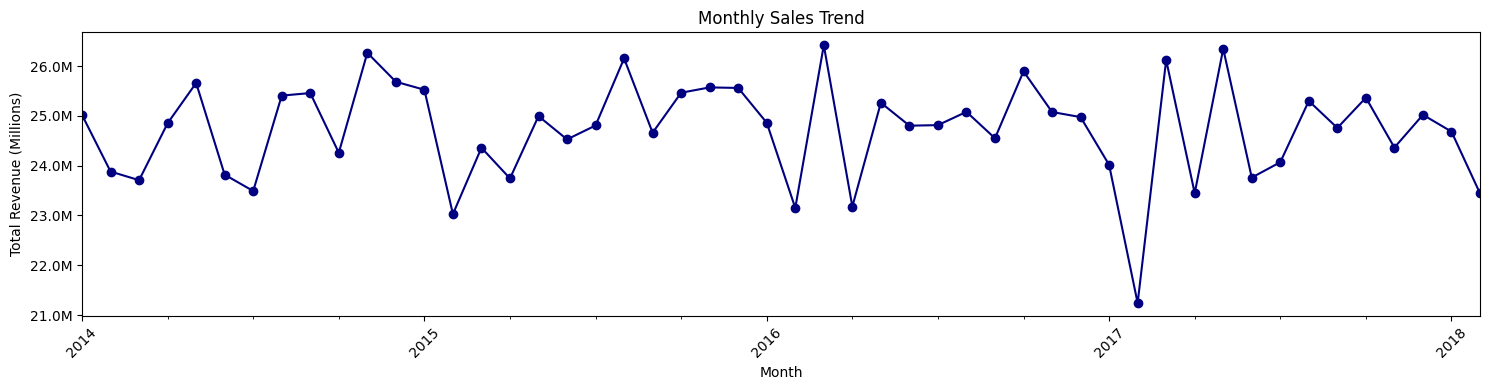

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # <-- This is the key change!
from matplotlib.ticker import FuncFormatter

# Assuming 'order_date' has already been converted to datetime
# df['order_date'] = pd.to_datetime(df['order_date']) # Run this first if you haven't yet

df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')

# Correcting the variable name 'formetter' to 'formatter' in your code
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M') # Corrected 1e6

plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

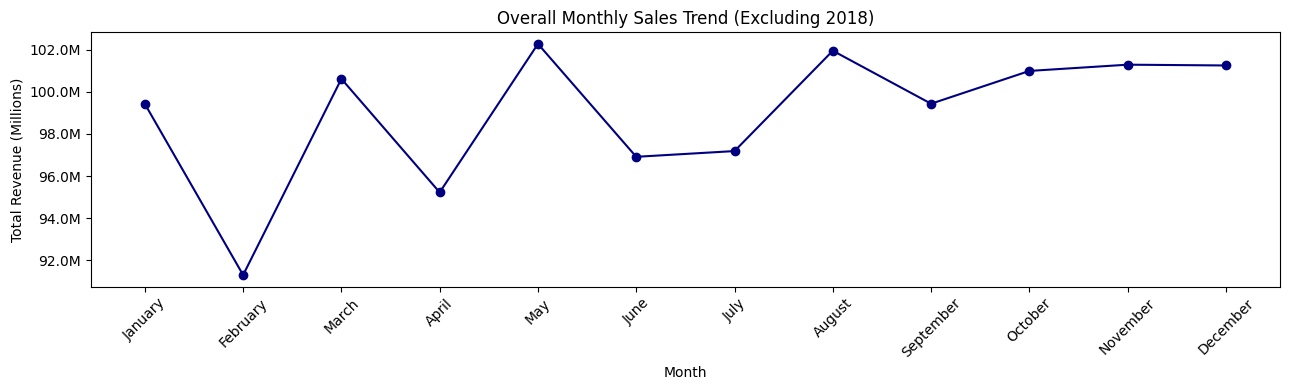

In [ ]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018].copy()

# 2. Create month columns
df_['order_month_num'] = df_['order_date'].dt.month
df_['order_month_name'] = df_['order_date'].dt.strftime('%B')

# 3. Group by month number and month name, sum revenue
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .reset_index()
)

# 4. Ensure all months appear in order (even if missing)
import calendar
month_order = list(calendar.month_name[1:])  # ['January', 'February', ... , 'December']

# Create a complete DataFrame with all months
all_months = pd.DataFrame({
    'order_month_name': month_order,
    'order_month_num': range(1, 13)
})

# Merge to include missing months (fill missing revenue with 0)
monthly_sales = (
    all_months
    .merge(monthly_sales, on=['order_month_num', 'order_month_name'], how='left')
    .fillna({'revenue': 0})
)

# 5. Plot
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales['order_month_name'],
    monthly_sales['revenue'],
    marker='o',
    color='navy'
)

# Format y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [145]:
print(df_.head())

        ordernumber order_date      customer_name      channel product_name  \
42355  SO - 0007069 2016-09-28       Snaptags Ltd  Distributor    Product 1   
42366  SO - 0007843 2016-09-28            The Ltd    Wholesale    Product 1   
14556  SO - 0001867 2014-12-11  Browsebug Company    Wholesale    Product 1   
27757  SO - 0005227 2015-10-18       Organon Corp  Distributor    Product 1   
27665  SO - 0007631 2015-10-16      Livepath Corp  Distributor    Product 1   

       order_quantity  unit_price  revenue  total unit cost state_code  ...  \
42355              11       241.2   2653.2          161.604         TX  ...   
42366               5       978.2   4891.0          743.432         NY  ...   
14556              12      2566.1  30793.2         1693.626         LA  ...   
27757               6      6056.8  36340.8         4118.624         CA  ...   
27665               8      1018.4   8147.2          661.960         FL  ...   

            lat  longitude budget  total_cost     

C:\Users\abc\AppData\Local\Temp\ipykernel_17108\1186821662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


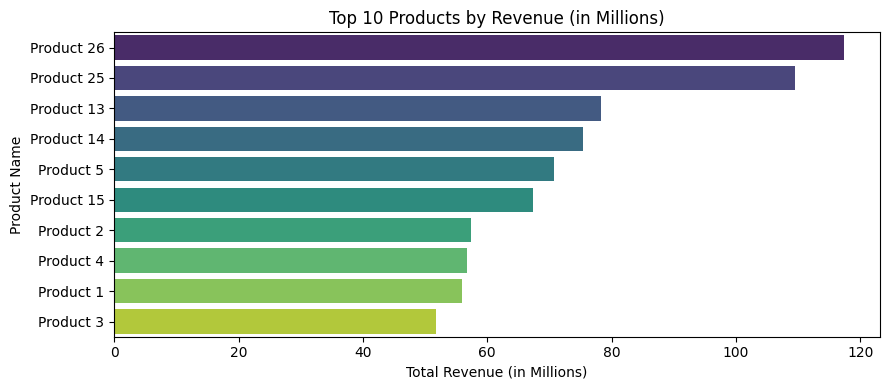

In [101]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_17108\583217306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


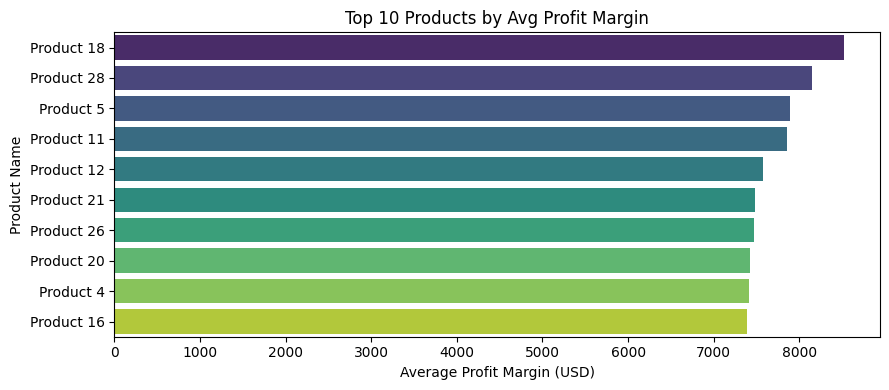

In [103]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df_.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis',       # Color palette for the bars
    dodge=False,
    legend=False
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

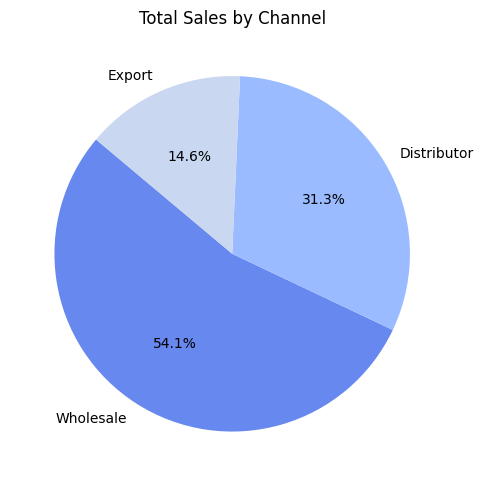

In [108]:
# Group revenue by sales channel and sort descending
chan_sales = df_.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

In [112]:
# Calculate the total revenue for each order to get the order value
aov = df_.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

KeyError: 'order_number'

In [113]:
# Calculate the total revenue for each order to get the order value
aov = df_.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

KeyError: 'order_number'

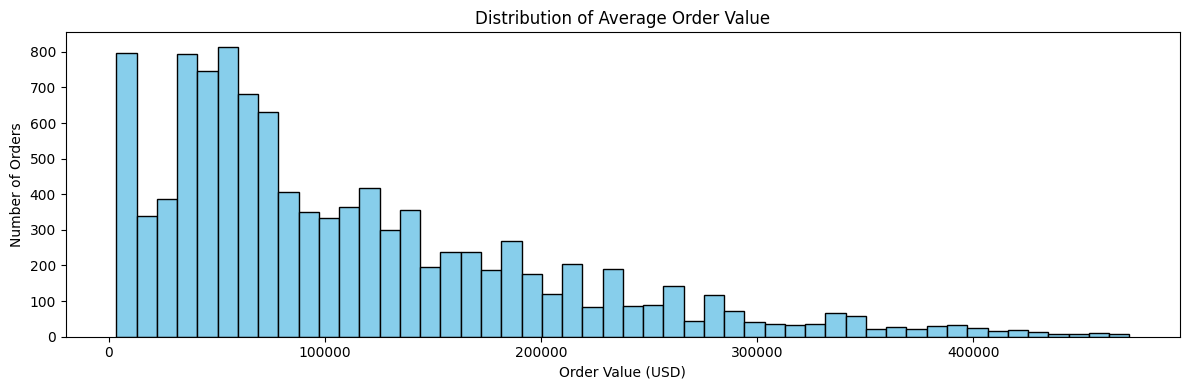

In [114]:
# Calculate the total revenue for each order to get the order value
aov = df_.groupby('ordernumber')['revenue'].sum()

# Plot histogram
plt.figure(figsize=(12, 4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [ ]:
#Unit price Distribution per product
#Top 10 States by Revenue and orders Count
#Average profit marging by channel
#Top and Bottom 10 customers by revenue 
#Custimer segementation: Revenue vs profit Margin
#Correlation Heatmap

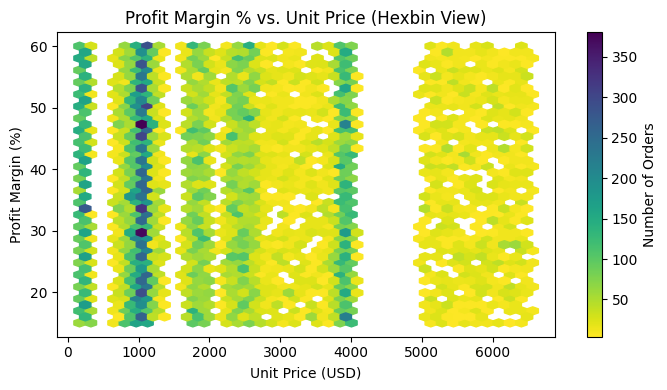

In [128]:
plt.figure(figsize=(7,4))
plt.hexbin(
    df_['unit_price'],
    df_['profit_margin_pct'],
    gridsize=40,
    cmap='viridis_r',   # darker for lower counts, lighter for higher
    mincnt=1
)

plt.colorbar(label='Number of Orders')
plt.title('Profit Margin % vs. Unit Price (Hexbin View)')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\abc\AppData\Local\Temp\ipykernel_17108\201969081.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_['product_num'] = df_['product_name'].str.extract('(\d+)').astype(int)


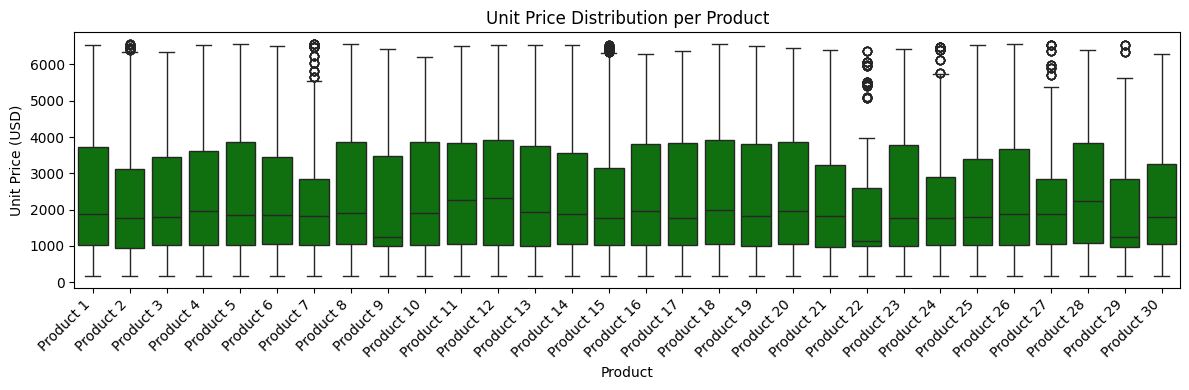

In [130]:
# Extract numeric part of product_name and sort
df_['product_num'] = df_['product_name'].str.extract('(\d+)').astype(int)

# Sort DataFrame by product number
df_ = df_.sort_values('product_num')

# Plot again
plt.figure(figsize=(12,4))
sns.boxplot(
    data=df_,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\abc\AppData\Local\Temp\ipykernel_17108\246417673.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


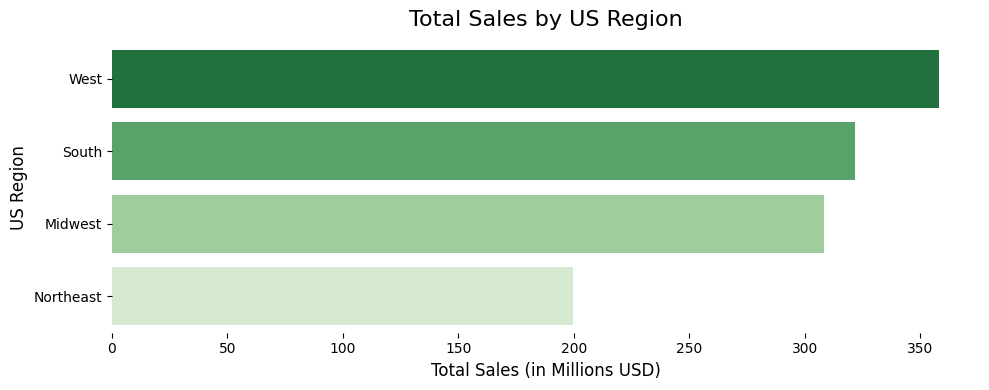

In [132]:
#Total Sales by US Region
# 1. Aggregate total sales by region (in millions)
region_sales = (
    df_
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [135]:
import plotly.express as px

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state_name')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state_name',            # column with state codes
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

In [136]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


In [137]:
fig.show()

In [139]:
import plotly.io as pio
pio.renderers.default = 'browser'
fig.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_17108\1923975042.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\abc\AppData\Local\Temp\ipykernel_17108\1923975042.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




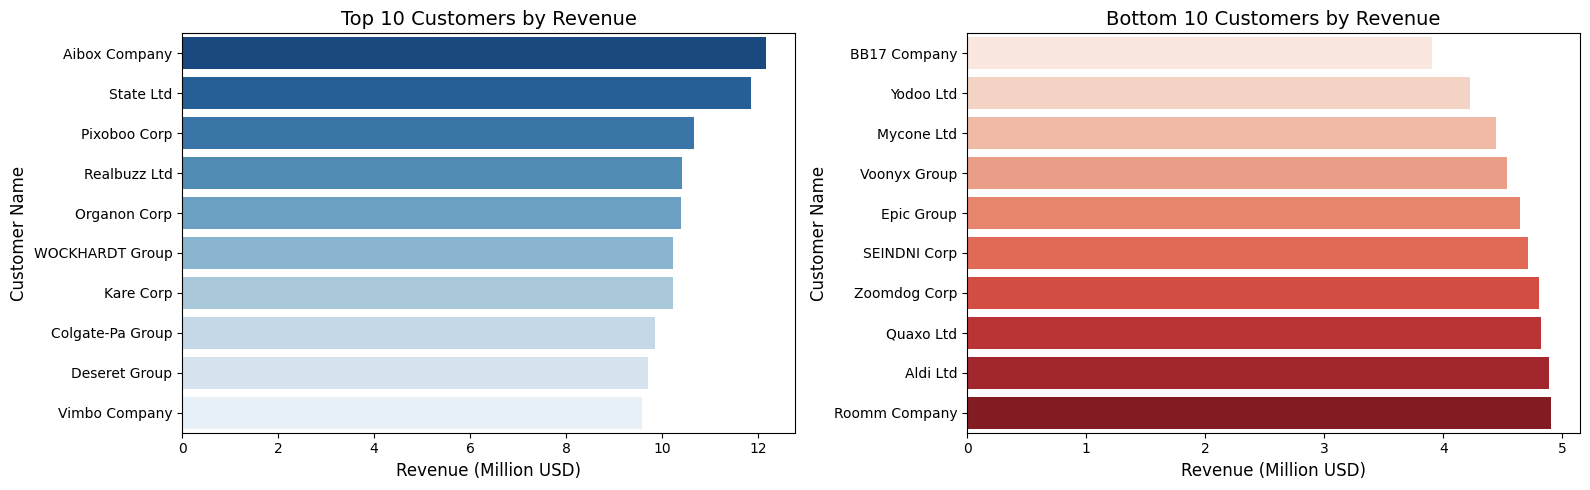

In [141]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df_.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df_.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()
     

C:\Users\abc\AppData\Local\Temp\ipykernel_17108\585096286.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




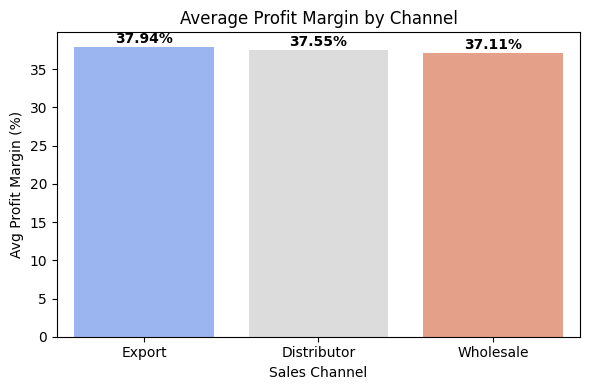

In [142]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df_.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_17108\3689094341.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




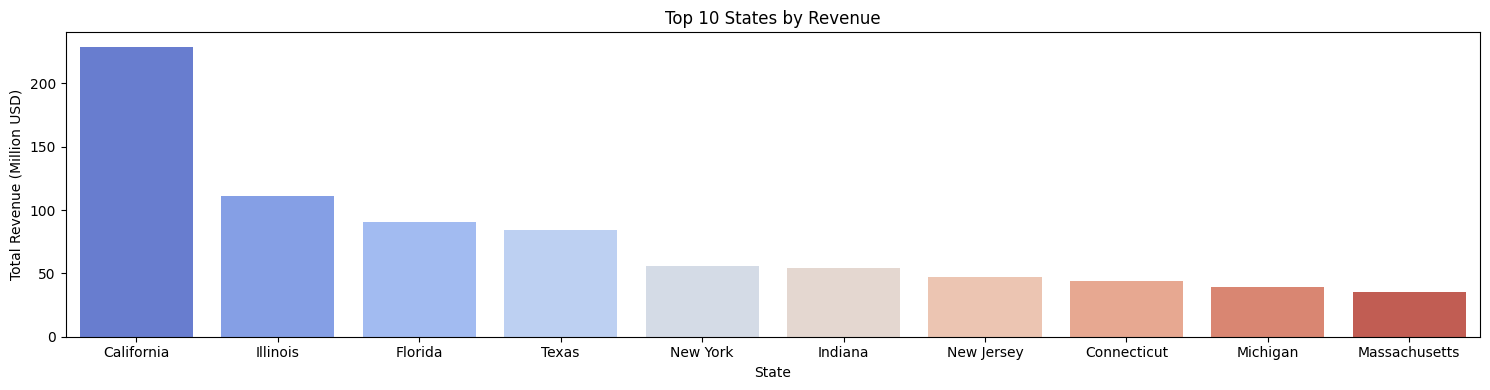

C:\Users\abc\AppData\Local\Temp\ipykernel_17108\3689094341.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




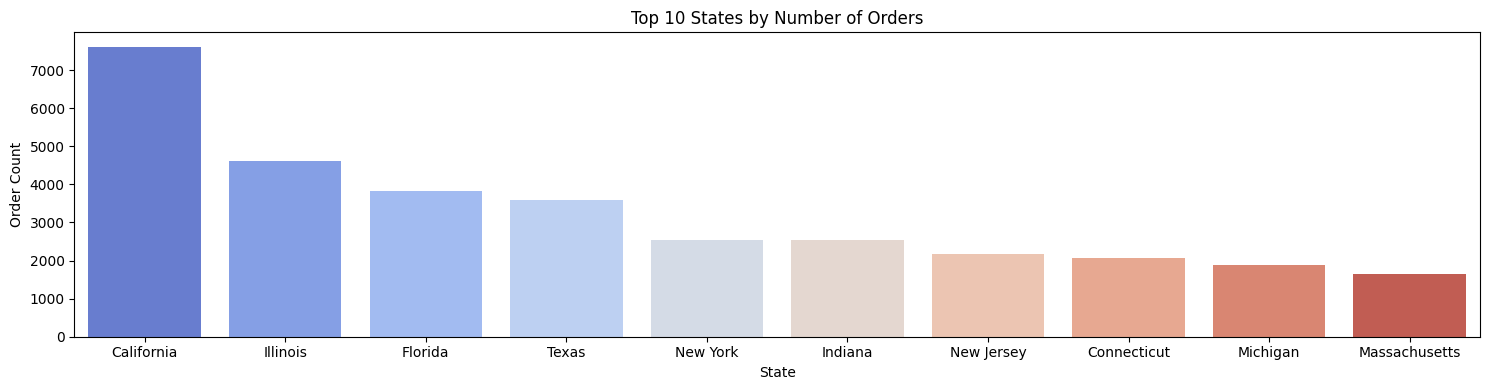

In [ ]:
# Aggregate total revenue and unique order count per state
state_rev = df_.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('ordernumber', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

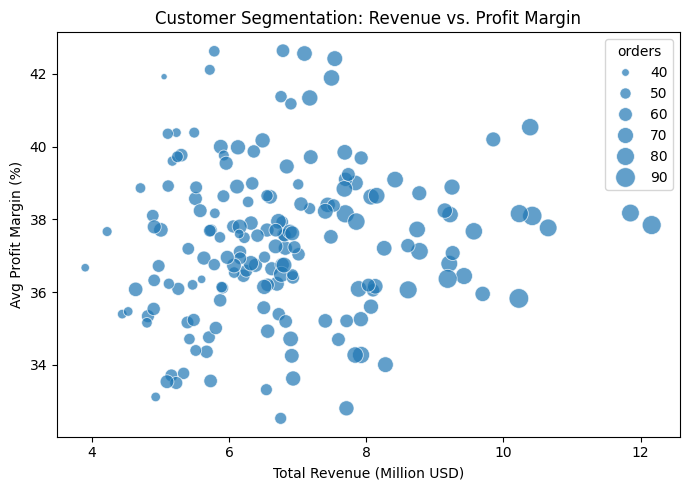

In [150]:
# Aggregate metrics per customer
cust_summary = df_.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('ordernumber', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

In [157]:
df.columns



Index(['ordernumber', 'order_date', 'customer_name', 'channel', 'product_name',
       'order_quantity', 'unit_price', 'revenue', 'total unit cost',
       'state_code', 'county', 'state_name', 'region', 'lat', 'longitude',
       'budget'],
      dtype='object')

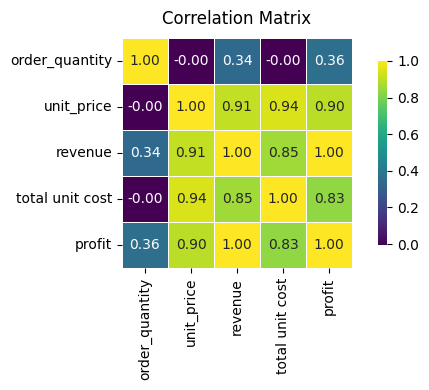

In [159]:
# Create a 'profit' column
df['profit'] = df['revenue'] - df['total unit cost']

# List numeric columns for correlation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total unit cost', 'profit']

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    cbar_kws={'shrink': 0.8},
    square=True,
    linewidths=0.5
)
plt.title('Correlation Matrix', pad=10)
plt.tight_layout()
plt.show()


In [160]:
df

,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state_name,region,lat,longitude,budget,profit
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,13170.257
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,24598.782
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,5184.460
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,15339.248
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,17070.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN,20807.922
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN,4606.719
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN,40834.490
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN,24787.722


In [161]:
df_

,ordernumber,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,...,lat,longitude,budget,total_cost,profit,profit_margin_pct,order_month,order_month_num,order_month_name,product_num
42355,SO - 0007069,2016-09-28,Snaptags Ltd,Distributor,Product 1,11,241.2,2653.2,161.604,TX,...,33.10317,-96.67055,NaN,1777.644,875.556,33.0,2016-09,9,September,1
42366,SO - 0007843,2016-09-28,The Ltd,Wholesale,Product 1,5,978.2,4891.0,743.432,NY,...,42.98337,-78.87567,NaN,3717.160,1173.840,24.0,2016-09,9,September,1
14556,SO - 0001867,2014-12-11,Browsebug Company,Wholesale,Product 1,12,2566.1,30793.2,1693.626,LA,...,32.51599,-93.73212,NaN,20323.512,10469.688,34.0,2014-12,12,December,1
27757,SO - 0005227,2015-10-18,Organon Corp,Distributor,Product 1,6,6056.8,36340.8,4118.624,CA,...,33.83585,-118.34063,NaN,24711.744,11629.056,32.0,2015-10,10,October,1
27665,SO - 0007631,2015-10-16,Livepath Corp,Distributor,Product 1,8,1018.4,8147.2,661.960,FL,...,25.77288,-80.34783,NaN,5295.680,2851.520,35.0,2015-10,10,October,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,SO - 0010699,2015-06-27,Liberty Group,Wholesale,Product 30,6,1092.1,6552.6,797.233,VA,...,37.41375,-79.14225,NaN,4783.398,1769.202,27.0,2015-06,6,June,30
61565,SO - 0008978,2017-12-30,Alembic Ltd,Distributor,Product 30,10,2211.0,22110.0,1127.610,CA,...,37.79743,-121.21605,1011609.684,11276.100,10833.900,49.0,2017-12,12,December,30
27,SO - 0005121,2014-01-01,Twitterbri Ltd,Wholesale,Product 30,6,5681.6,34089.6,4090.752,MA,...,42.37510,-71.10561,NaN,24544.512,9545.088,28.0,2014-01,1,January,30
14631,SO - 0007036,2014-12-12,Voonyx Group,Export,Product 30,7,1889.4,13225.8,831.336,IL,...,40.11506,-88.27365,NaN,5819.352,7406.448,56.0,2014-12,12,December,30
